In [5]:
import pandas as pd

# 붓꽃 데이터 CSV 파일 읽기
file_path = 'C:/Users/dudnj/Gachon/4-2/AI/Week_01/iris.csv'  # 본인이 iris.csv를 저장한 경로를 입력합니다.
df = pd.read_csv(file_path)

# 데이터프레임 확인
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print(df.columns)

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')


In [9]:
### 1️⃣ 결정 트리 (Decision Tree, DT)

#- 결정 트리는 트리 구조를 이용하여 데이터를 분류하는 모델입니다.
#- 각 노드에서 특정 특성을 기준으로 데이터를 나누며, 최종적으로 리프 노드에서 클래스를 결정합니다.
#- 직관적이고 해석이 쉬우며, 시각화가 가능하다는 장점이 있습니다.
#- 하지만 트리 깊이가 깊어지면 과적합(overfitting)될 가능성이 있습니다.


결정 트리 분류 정확도: 1.0000


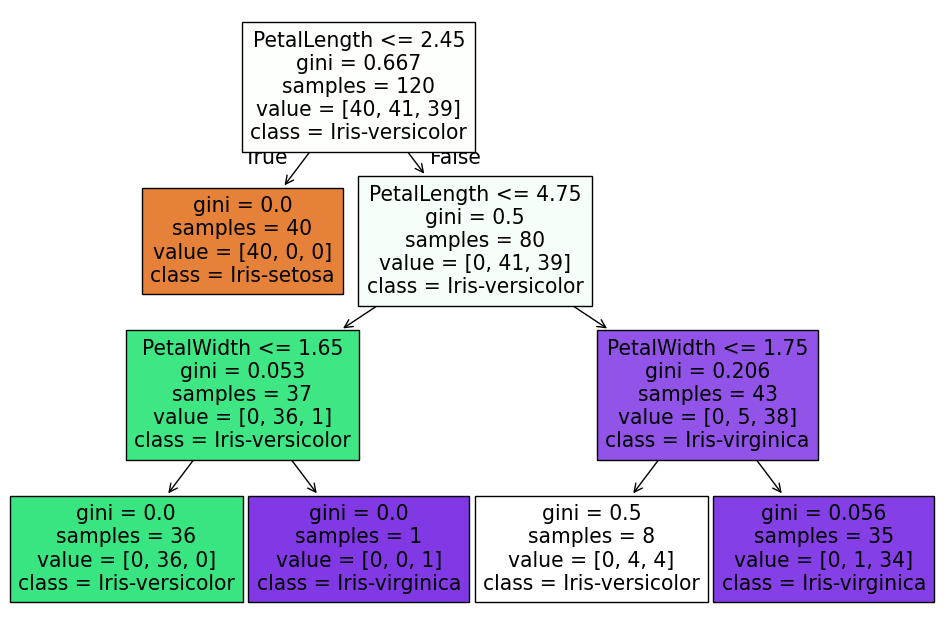

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 데이터 로드
file_path = 'C:/Users/dudnj/Gachon/4-2/AI/Week_01/iris.csv'  # CSV 파일 경로

df = pd.read_csv(file_path)

# 특성과 타겟 분리
X = df.iloc[:, :-1]  # 마지막 열 제외 (특성)
y = df.iloc[:, -1]   # 마지막 열 (타겟: 품종)

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 생성 및 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# 예측 수행
y_pred = dt.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'결정 트리 분류 정확도: {accuracy:.4f}')

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=np.unique(y), filled=True)
plt.show()

In [12]:
### 2️⃣ 랜덤 포레스트 (Random Forest, RF)

#- 랜덤 포레스트는 여러 개의 결정 트리를 만들어 다수결 투표 방식으로 최종 예측을 수행하는 앙상블 학습 기법입니다.
#- 과적합을 방지하고 일반화 성능을 높이는 데 효과적입니다.
#- 트리 개수를 늘리면 더 안정적인 결과를 얻을 수 있습니다.


랜덤 포레스트 분류 정확도: 1.0000


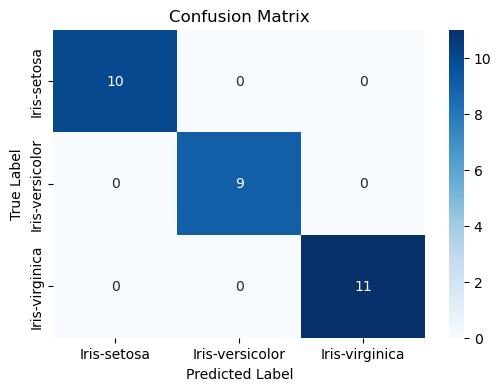

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 로드
file_path = 'C:/Users/dudnj/Gachon/4-2/AI/Week_01/iris.csv'  # CSV 파일 경로
df = pd.read_csv(file_path)

# 특성과 타겟 분리
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 수행
y_pred = rf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'랜덤 포레스트 분류 정확도: {accuracy:.4f}')

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Classification Result')
plt.show()


In [14]:
### 3️⃣ 서포트 벡터 머신 (Support Vector Machine, SVM)

#- SVM은 데이터의 경계를 나누는 최적의 초평면을 찾아 분류하는 모델입니다.
#- 선형 분리가 어려운 경우 커널 트릭(kernel trick)을 사용하여 고차원 공간에서 분류할 수 있습니다.
#- 고차원 데이터에서도 강력한 성능을 발휘하지만, 데이터가 많으면 학습 속도가 느릴 수 있습니다.


SVM 분류 정확도: 1.0000


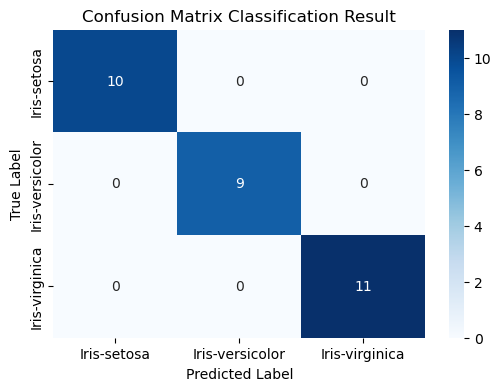

In [34]:

from sklearn.svm import SVC

# 데이터 로드
file_path = 'C:/Users/dudnj/Gachon/4-2/AI/Week_01/iris.csv'  # CSV 파일 경로
df = pd.read_csv(file_path)

# 특성과 타겟 분리
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 생성 및 훈련
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# 예측 수행
y_pred = svm.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM 분류 정확도: {accuracy:.4f}')

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Classification Result')
plt.show()



In [20]:
### 4️⃣ 로지스틱 회귀 (Logistic Regression, LR)

#- 로지스틱 회귀는 선형 모델을 기반으로 확률을 예측하는 모델입니다.
#- 다중 클래스 분류에서는 소프트맥스 함수(Softmax Function)를 이용합니다.
#- 계산이 빠르고 해석이 쉬운 장점이 있지만, 선형 관계가 강한 데이터에서만 좋은 성능을 보입니다.


로지스틱 회귀 분류 정확도: 1.0000


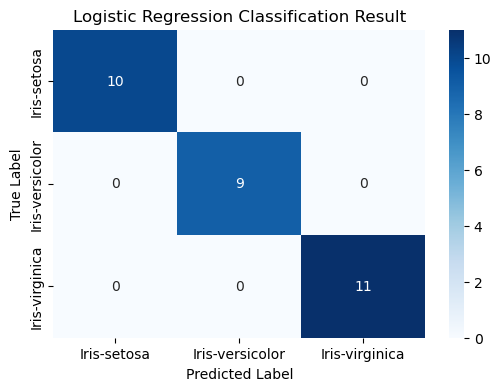

In [32]:
from sklearn.linear_model import LogisticRegression

# 데이터 로드
file_path = 'C:/Users/dudnj/Gachon/4-2/AI/Week_01/iris.csv'  # CSV 파일 경로
df = pd.read_csv(file_path)

# 특성과 타겟 분리
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 훈련
lr = LogisticRegression(max_iter=200, random_state=42)
lr.fit(X_train, y_train)

# 예측 수행
y_pred = lr.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'로지스틱 회귀 분류 정확도: {accuracy:.4f}')

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Classification Result')
plt.show()
